In [10]:
import sys


path = "/home/someone/stage_jonathan/lightning-sam/lightning-sam/l_sam_env/lib/python3.10/site-packages"

if path not in sys.path:
    sys.path.append(path)

In [11]:
from config import cfg

In [12]:
path_to_img = "/mnt/data/CUB_200_2011/images"

In [13]:
import os 
import cv2
import matplotlib.pyplot as plt

In [14]:
file = os.listdir(path_to_img)[150]
print(file)

148.Green_tailed_Towhee


In [15]:
 file+"/"+os.listdir(os.path.join(path_to_img,file))[6]

'148.Green_tailed_Towhee/Green_Tailed_Towhee_0079_154764.jpg'

In [16]:
img = cv2.imread(os.path.join(path_to_img+"/"+file, 
                              os.listdir(os.path.join(path_to_img,
                                                      file))[6]))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

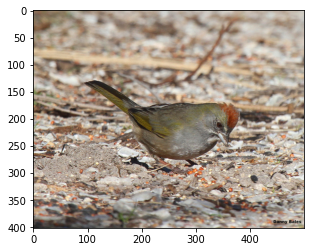

In [17]:
plt.imshow(img)
plt.show()

In [18]:

box_file = "/mnt/data/CUB_200_2011/bounding_boxes.txt"
img_dir = "/mnt/data/CUB_200_2011/images.txt"


with open(box_file,"r") as f:
    temp = f.readlines()

    # format i x1 y1 x2 y2 
    boxes = [list(map(lambda x : int(float(x)), line.split()[1:])) for line in temp] 

with open(img_dir,"r") as f:
    temp = f.readlines()
    # format i folder_name/image_name
    img_names = [os.path.join(path_to_img,line.split()[1]) for line in temp]

In [19]:
from custom_transform import LocalizedRandomResizedCrop

In [20]:
idx = [(i,name) for (i,name) in enumerate(img_names) if  file+"/"+os.listdir(os.path.join(path_to_img,file))[6] in name ][0]

In [21]:
boxes[idx[0]]

[90, 127, 292, 174]

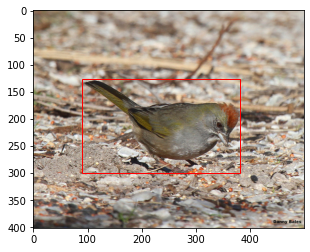

In [22]:
# convert to PIL
from PIL import Image
from matplotlib.patches import Rectangle

img_pil = Image.fromarray(img)

# (x,y) , w, h
fig, ax = plt.subplots()
ax.imshow(img_pil)
x,y,xw,yh = boxes[idx[0]]


rect = Rectangle((x,y),xw,yh, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

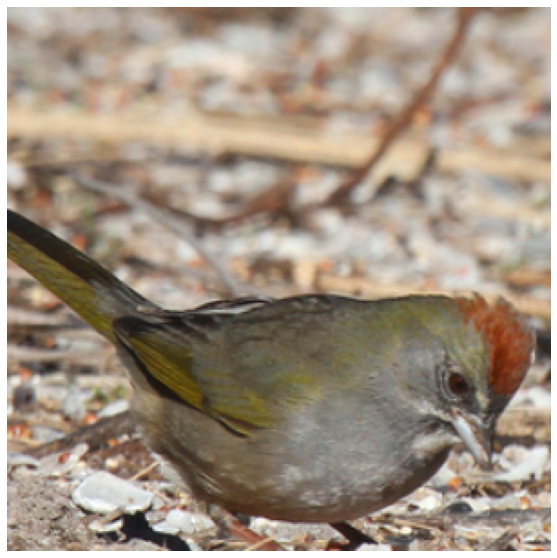

In [43]:
x,y,w,h = boxes[idx[0]]

cropped = LocalizedRandomResizedCrop(img_pil,*[x,y,w,h],size=300, alpha=0.3)
plt.figure(figsize=(10,10))
plt.imshow(cropped)
plt.axis("off")
plt.show()

In [89]:
from dataset import load_cub_datasets
cfg.use_box = True
train_local, val_local = load_cub_datasets(cfg,alpha=0.3)
cfg.use_box = False
train_rando, val_rando = load_cub_datasets(cfg,alpha=0)

Using localized crop
Using random crop
Using random crop
Using random crop


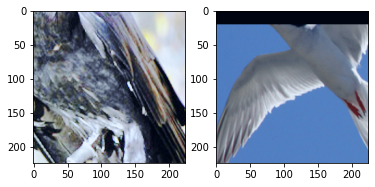

In [ ]:
for (imgs1, labels1), (imgs2, labels2) in zip(train_local,train_rando):
    for img1, img2 in zip(imgs1,imgs2):
        img1 = img1.permute((1,2,0))
        img1 -= img1.min()
        img1/=img1.max()
        
        img2 = img2.permute((1,2,0))
        img2 -= img2.min()
        img2/=img2.max()
        
        plt.subplot(1,2,1)
        plt.imshow(img1)
        plt.subplot(1,2,2)
        plt.imshow(img2)
        plt.show()

        
    break